<a href="https://colab.research.google.com/github/davidogm/NM/blob/main/Stock_market_analysis_and_prediction_using_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis bursátil 
Estudiaremos datos del mercado de valores, en particular de 4 valores tecnológicos. Empezamos con pandas para obtener información sobre las acciones de forma rápida, visualizaremos diferentes aspectos de las mismas y, finalmente, veremos algunas formas de analizar el riesgo de una acción, basándonos en su historial de rendimiento anterior. 

También predeciremos los precios futuros de las acciones mediante un método de memoria a largo plazo (Long Short Term Memory - LSTM).

Usaremos una serie de preguntas a lo largo del proceso:



Long Short Term Memory (LSTM) method!

    1.) ¿Cuál ha sido la evolución del precio de las acciones a lo largo del tiempo?
    2.) ¿Cuál fue el rendimiento diario de las acciones en promedio?
    3.) ¿Cuál fue la media móvil de las distintas acciones?
    4.) ¿Cuál fue la correlación entre las distintas acciones?
    5.) ¿Qué valor ponemos en riesgo al invertir en una determinada acción?
    6.) ¿Cómo podemos intentar predecir el comportamiento futuro de las acciones? (particularizamos por ejemplo en la predicción del precio de cierre de las acciones de APPLE inc utilizando LSTM)
   

# 1.) ¿Cuál ha sido la evolución del precio de las acciones a lo largo del tiempo?


Repaso del manejo de la solicitud de información de stock o acciones a través de pandas, y cómo analizar los atributos básicos de un stock.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [4]:
pip install --upgrade pandas-datareader


     |████████████████████████████████| 109 kB 4.0 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [4]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

Quick note: Using globals() is a sloppy way of setting the DataFrame names, but its simple

Let's go ahead and play aorund with the AAPL DataFrame to get a feel for the data

In [5]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2022-03-16,3063.000000,2947.070068,2970.000000,3062.080078,4247900.0,3062.080078,AMAZON
2022-03-17,3149.969971,3042.800049,3052.810059,3144.780029,3646700.0,3144.780029,AMAZON
2022-03-18,3231.879883,3120.219971,3136.260010,3225.010010,5141300.0,3225.010010,AMAZON
2022-03-21,3261.679932,3191.060059,3222.419922,3229.830078,3326900.0,3229.830078,AMAZON
2022-03-22,3323.340088,3233.979980,3236.110107,3297.780029,3204300.0,3297.780029,AMAZON
2022-03-23,3327.399902,3253.739990,3274.100098,3268.159912,2790600.0,3268.159912,AMAZON
2022-03-24,3282.370117,3201.000000,3274.989990,3272.989990,2839900.0,3272.989990,AMAZON
2022-03-25,3307.370117,3245.000000,3280.000000,3295.469971,2451600.0,3295.469971,AMAZON
2022-03-28,3380.750000,3298.000000,3299.500000,3379.810059,2989500.0,3379.810059,AMAZON


In [ ]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-05-18,79.125000,77.580002,78.292503,78.739998,135178400.0,78.212997,APPLE
2020-05-19,79.629997,78.252502,78.757500,78.285004,101729600.0,77.761040,APPLE
2020-05-20,79.879997,79.129997,79.169998,79.807503,111504800.0,79.273354,APPLE
2020-05-21,80.222504,78.967499,79.665001,79.212502,102688800.0,78.682327,APPLE
2020-05-22,79.807503,78.837502,78.942497,79.722504,81803200.0,79.188927,APPLE


In [ ]:
df.shape

(1008, 7)

In [ ]:
# Summary Stats
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,117.757639,114.703849,116.337669,116.259573,1.280697e+08,115.825404
std,16.420936,15.993195,16.345629,16.179933,5.248386e+07,16.280252
min,79.125000,77.580002,78.292503,78.285004,4.669130e+07,77.761040
25%,112.177498,108.725002,110.403749,110.274998,9.030280e+07,109.734428
50%,121.515003,118.705002,120.090000,120.109997,1.127522e+08,119.901588
75%,129.727501,126.772501,128.540001,127.950003,1.532816e+08,127.717728
max,145.089996,141.369995,143.600006,143.160004,3.743368e+08,142.704010


In [ ]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-05-18 to 2021-05-17
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          252 non-null    float64
 1   Low           252 non-null    float64
 2   Open          252 non-null    float64
 3   Close         252 non-null    float64
 4   Volume        252 non-null    float64
 5   Adj Close     252 non-null    float64
 6   company_name  252 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.8+ KB


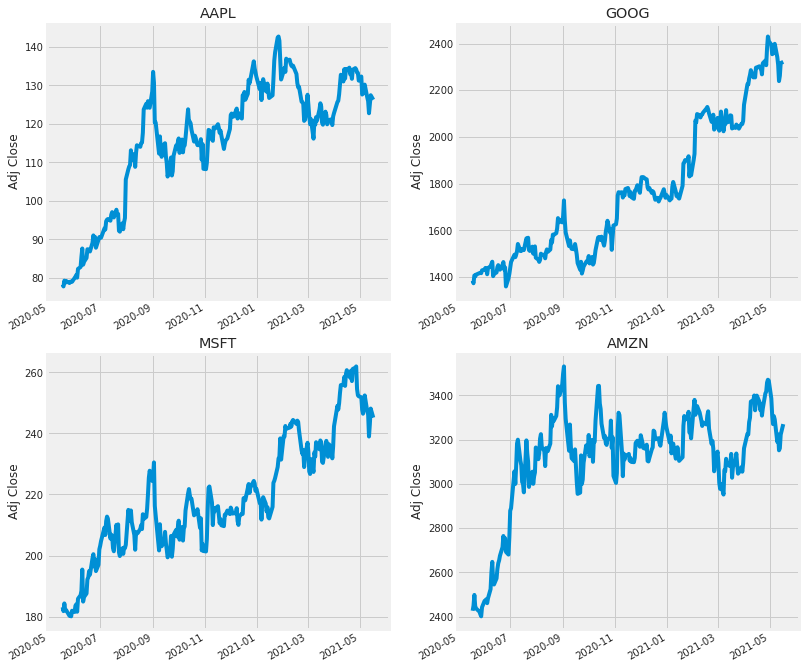

In [ ]:
# Let's see a historical view of the closing price
# de cada una de las acciones


plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

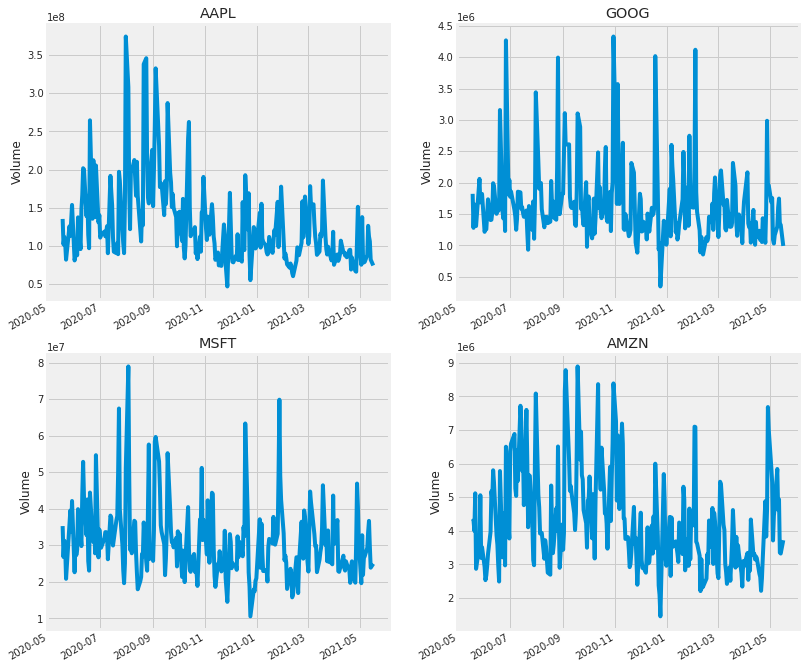

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

#2) ¿Cuál fue el rendimiento diario de las acciones en promedio?






In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [ ]:
print(GOOG.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


In [ ]:
print(MSFT.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


Now let's go ahead and plot all the additional Moving Averages

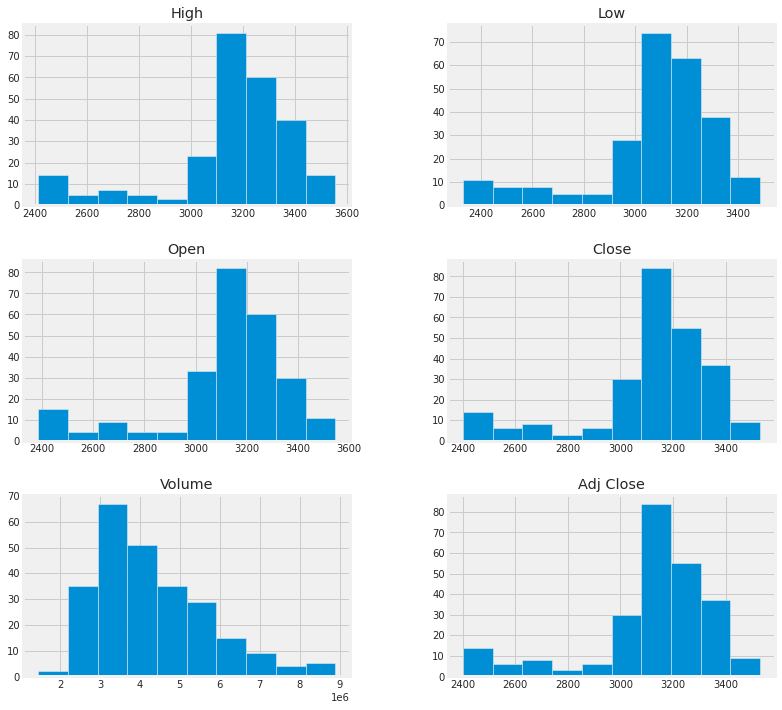

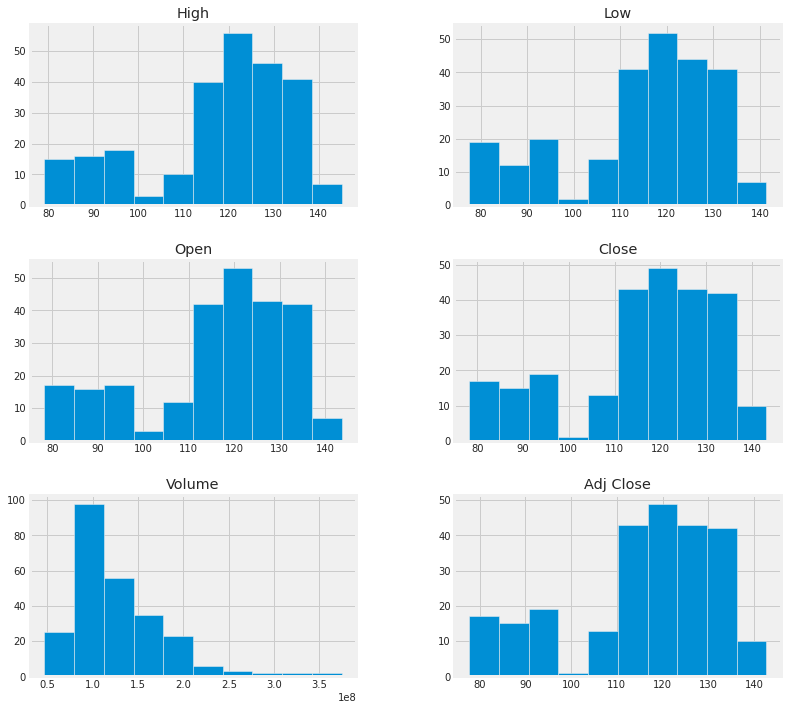

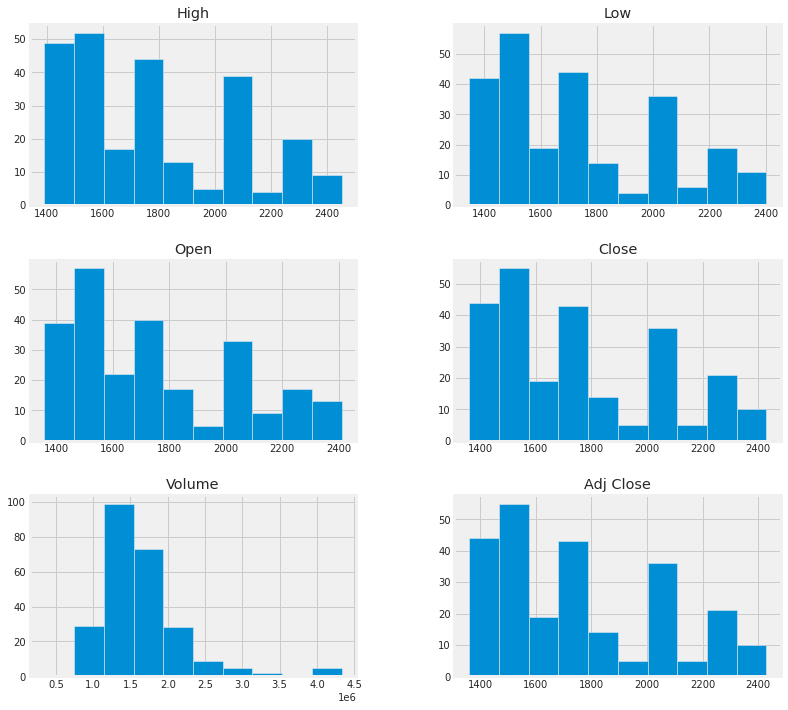

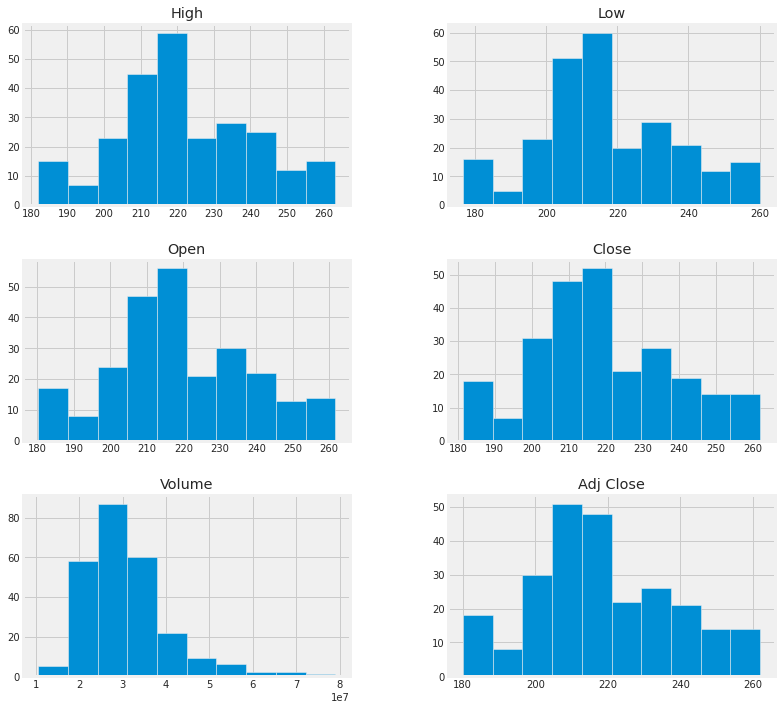

In [ ]:
df.groupby("company_name").hist(figsize=(12, 12));

y sacamos la evolución de las acciones con un **rolling**

como lo que vimos en series temporales

recordad como se atenua la tendencia conforme se incrementa el rolling de 20 y 50 días

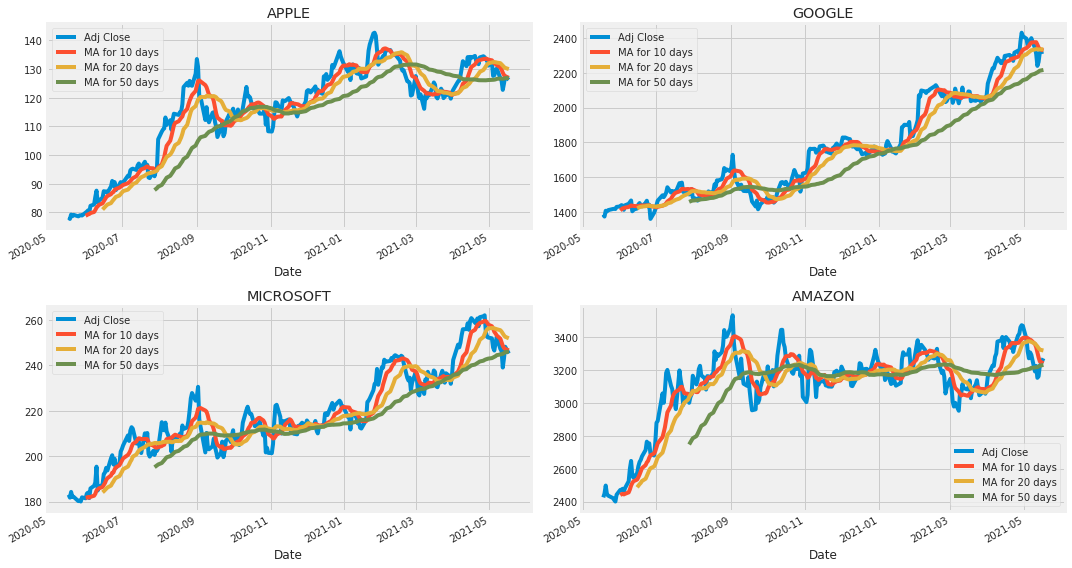

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

# 3) ¿Cuál fue la media móvil de las distintas acciones?

Profundizemos un poco más, analizando el riesgo de cada acción (stock market).

Observaremos más de cerca los cambios diarios de la acción, y no sólo su valor absoluto, recuperando los rendimientos diarios de las acciones

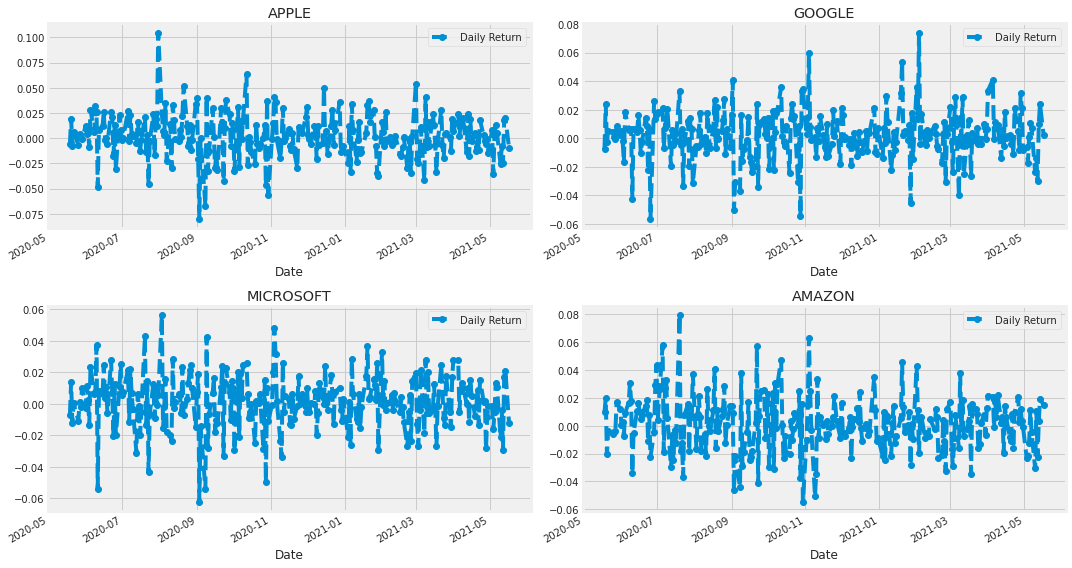

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Ahora vamos a echar un vistazo general a la rentabilidad media diaria utilizando un histograma con seaborn

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

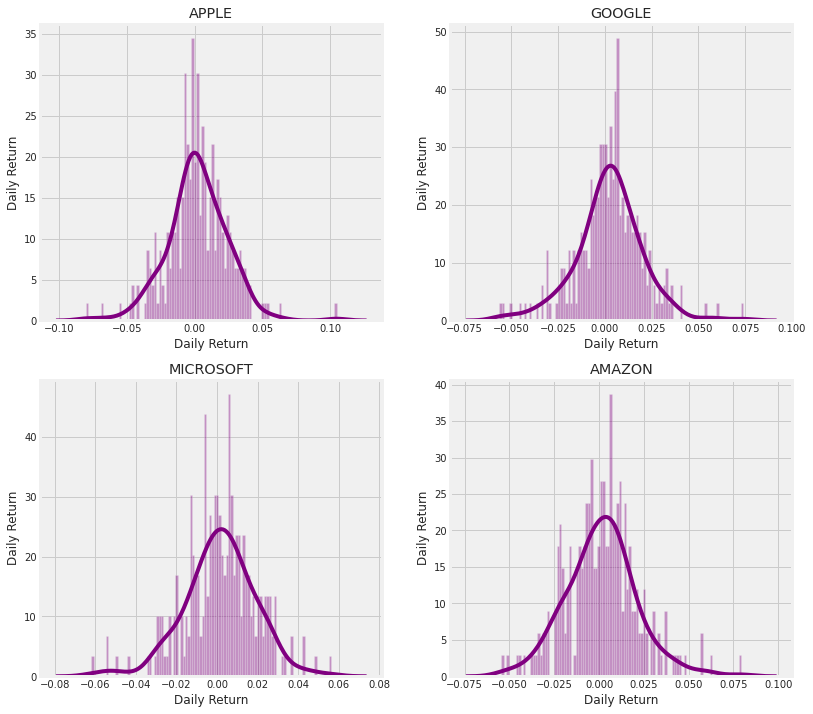

In [ ]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
# conocemos ya los problemas con NaN

plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')


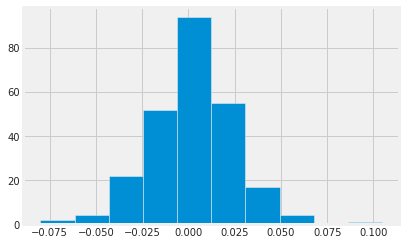

In [ ]:
# también se podría haber usado esto
AAPL['Daily Return'].hist()

# 4) ¿Cuál fue la correlación entre las distintas acciones?

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-05-18,78.212997,1383.939941,183.049850,2426.260010
2020-05-19,77.761040,1373.484985,181.782730,2449.330078
2020-05-20,79.273354,1406.719971,184.304169,2497.939941
2020-05-21,78.682327,1402.800049,182.090454,2446.739990
2020-05-22,79.188927,1410.420044,182.169861,2436.879883


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Apple stock.

In [ ]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-05-18,NaN,NaN,NaN,NaN
2020-05-19,-0.005779,-0.007554,-0.006922,0.009508
2020-05-20,0.019448,0.024198,0.013871,0.019846
2020-05-21,-0.007456,-0.002787,-0.012011,-0.020497
2020-05-22,0.006439,0.005432,0.000436,-0.004030


Ahora podemos comparar la rentabilidad porcentual diaria de dos valores para comprobar su correlación. 

Empezamos comparando una acción o stock consigo mismo.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


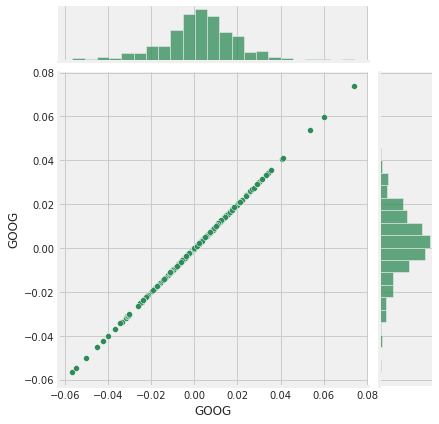

In [ ]:
# Comparing Google to itself should show a perfectly linear relationship, sólo para verificarlo
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


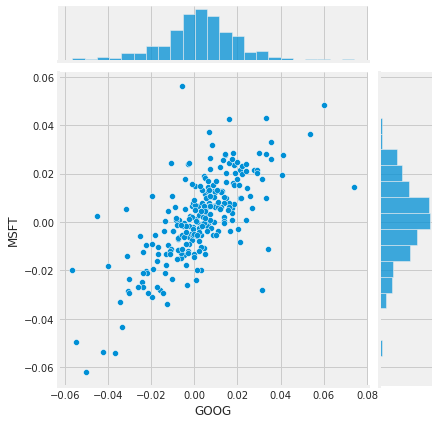

In [ ]:
# y continuamos con algunos del resto de ejemplos
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

Intentamos ver como pueden correlacionarse algunos de los otros valores

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

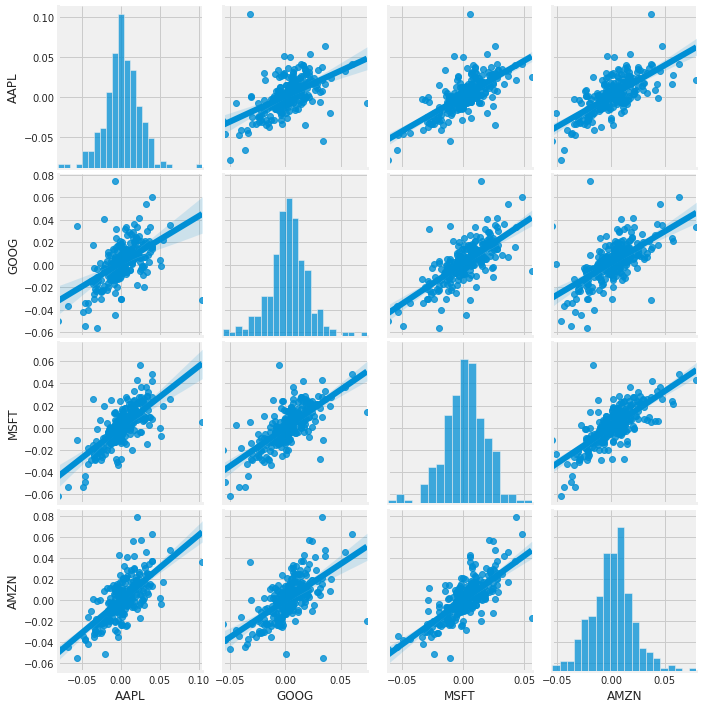

In [ ]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

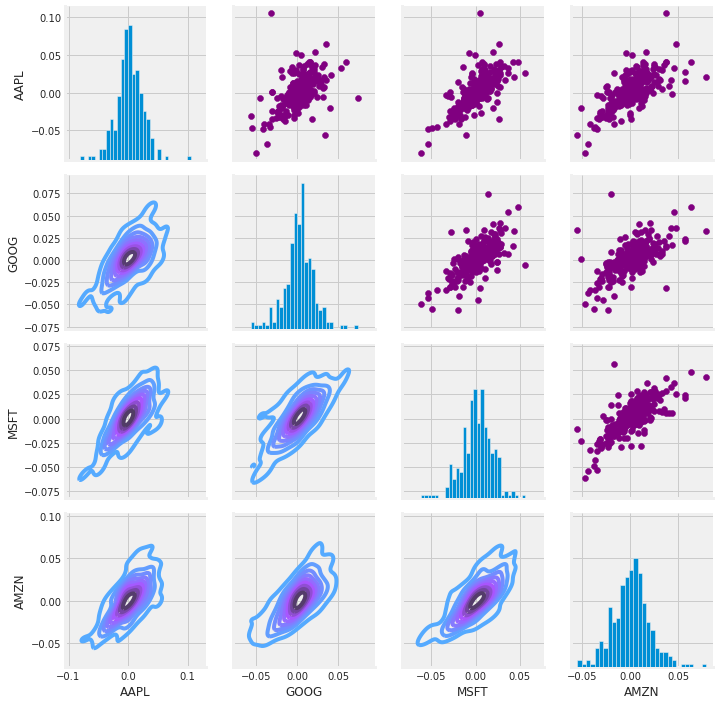

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

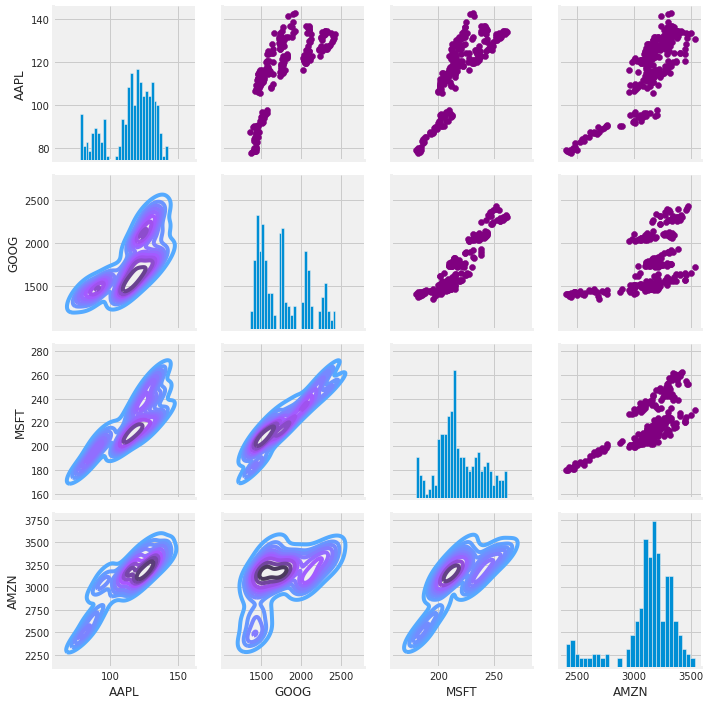

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

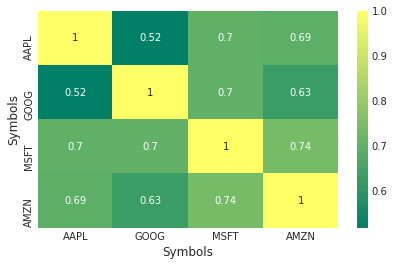

In [ ]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

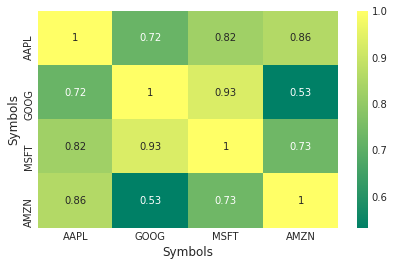

In [ ]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# 5) ¿Qué valor ponemos en riesgo al invertir en una determinada acción?



There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

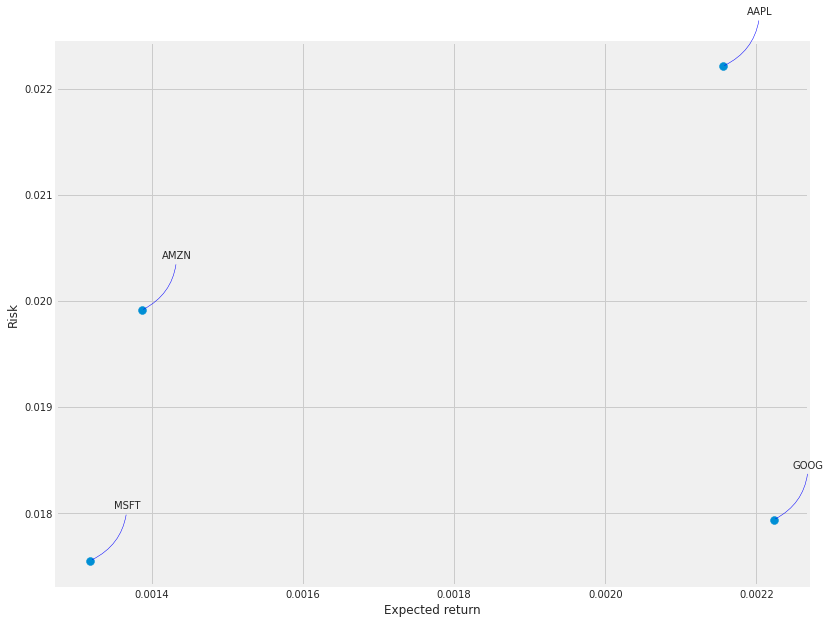

In [ ]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

#  6.) ¿Cómo podemos intentar predecir el comportamiento futuro de las acciones? 

(Por ejemplo la predicción del precio de cierre de las acciones de APPLE inc utilizando LSTM)

In [6]:
# Get the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
# Mostramos los datos
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.575918
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.643502
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.783871
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.917510
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.897020
...,...,...,...,...,...,...
2022-03-23,172.639999,167.649994,167.990005,170.210007,98062700.0,170.210007
2022-03-24,174.139999,170.210007,171.059998,174.070007,90131400.0,174.070007
2022-03-25,175.279999,172.750000,173.880005,174.720001,80470700.0,174.720001


In [ ]:
df

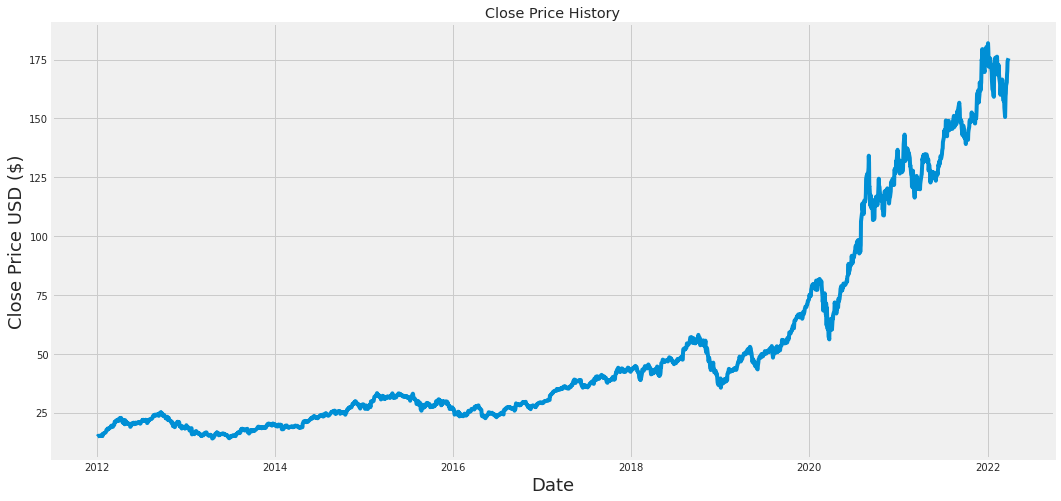

In [7]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [8]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2449

In [9]:
data.shape

(2577, 1)

In [10]:
# recordad la importancia de escalar/normalizar los datos, siempre pero más aún con ANN
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.95662332],
       [0.9618595 ],
       [0.9618595 ]])

In [11]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [12]:
# revisemos las dimensiones de los conjuntos de datos
print(data.shape)
print(train_data.shape)
print('el restante para el conjunto de test: %i' % (len(data)-len(train_data)))

(2577, 1)
(2449, 1)
el restante para el conjunto de test: 128


# **Modelos LSTM**

Como en otros casos, preprocesamiento la parte anterior

Podemos ver que es muy interesante porque entrena muy rápido con LSTM

Para resumir podemos decir que es una versión mejora de las RNN con memoria a largo plazo

In [13]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2389/2389 [==============================] - 52s 19ms/step - loss: 9.3124e-04


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

8.934243943551081

In [ ]:
# vemos y comprobamos el tamaño dejado para el conjunto de datos test
test_data.shape

(177, 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


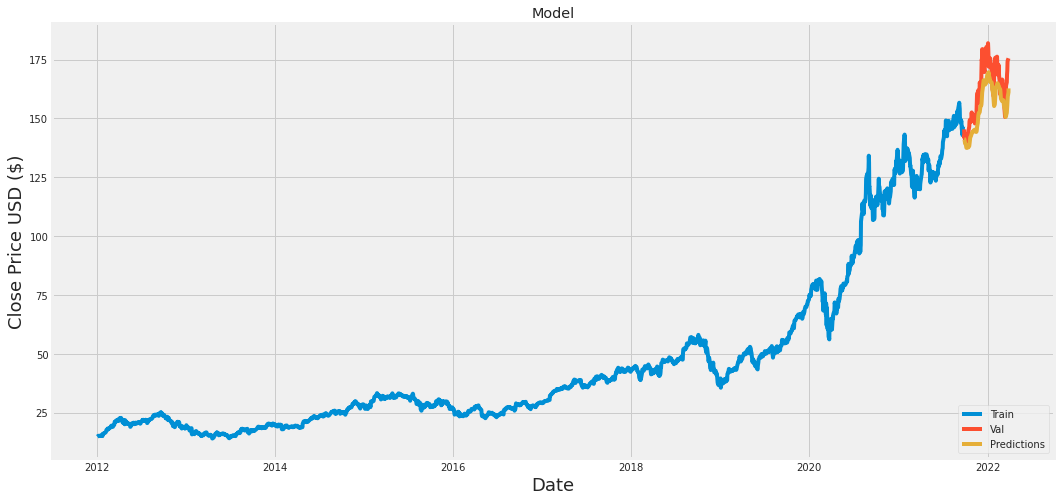

In [17]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions  # añadimos una columna al dataset test con las predicciones y así lo podemos comparar como vemos en la tabla de abajo
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [18]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-09-27,145.369995,141.274490
2021-09-28,141.910004,141.235886
2021-09-29,142.830002,140.649963
2021-09-30,141.500000,140.079376
2021-10-01,142.649994,139.401367
...,...,...
2022-03-23,170.210007,155.551346
2022-03-24,174.070007,157.313217
2022-03-25,174.720001,159.332565
